# CIFAR-10 Classifier
Author: Wojciech Balik

In [1]:
%pylab inline
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.activations import relu, elu, sigmoid
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model, model_from_json
from time import time
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
def save_model():
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save('nnet.h5')
    
def load_model1():
    with open('model.json') as file_:
        model = model_from_json(file_.read(), custom_objects={'relu12' : relu12})
    model = load_model('nnet.h5',  custom_objects={'relu12' : relu12})
    return model

# Preparing Data
I'm using interface provided by keras to get CIFAR-10. I'ts very easy and you dont have to worry about configuring things. You only need to download it

In [3]:
train_batch_size = 256
validation_batch_size = 256
test_batch_size = 256
epochs = 10


img_shape = (32,32,3)
num_classes = 10
num_channels = 3

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

labels = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
img_idx_det = [38404, 43685, 27716, 11599, 37602, 18317, 6866, 11101, 36790, 15382, 37521, 32752,
 18361,  2301, 39890, 48678, 18133, 26808, 32202,  5882, 21374, 1413, 23392, 27619]

In [6]:
rows = 3
img_per_row = 8
img_idx = np.random.choice(x_train.shape[0], rows*img_per_row, replace=False)
images = x_train[img_idx]



images_labels = labels[y_train.argmax(axis=1)[img_idx]]


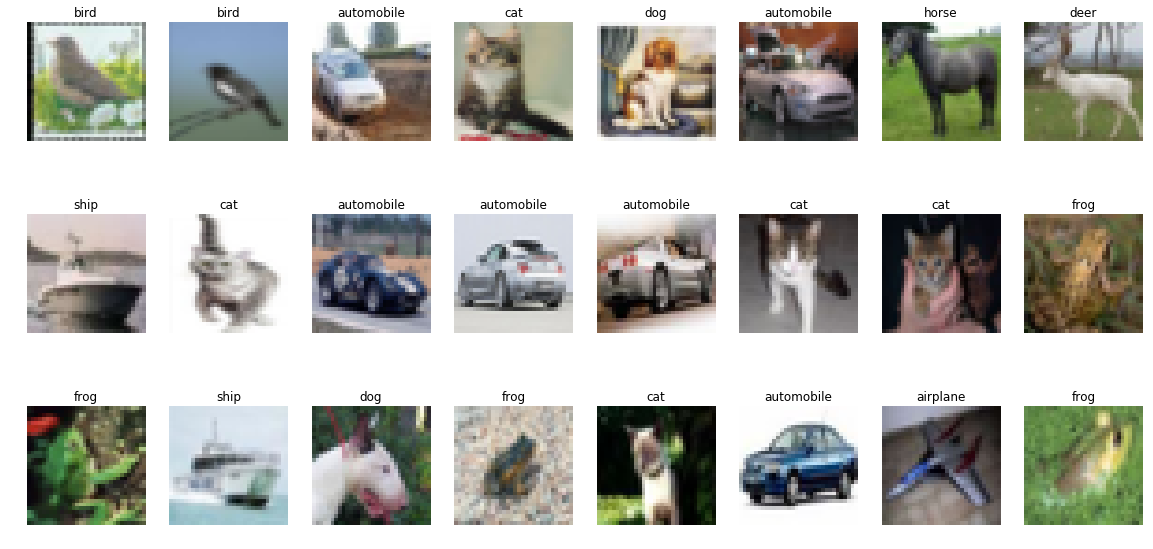

In [7]:
f, axarr = plt.subplots(rows, img_per_row, figsize=(20, 10))
img_counter = 0
for i in range(rows):
    for j in range(img_per_row):
        axarr[i, j].set_axis_off()
        axarr[i, j].imshow(images[img_counter])
        axarr[i, j].set_title(images_labels[img_counter])
        img_counter += 1


In [8]:
def makeRelu(maxVal):
    return lambda t : relu(t, max_value=maxVal)

In [9]:
def relu6(x):
    return relu(x, max_value=6.)
def relu12(x):
    return relu(x, max_value=12.)
def relu1(x):
    return relu(x, max_value=1.)

# Training
Model is trained using ADAM optimizer, initially with default learning rate($0.001$) and after some iteration I lowered learning rate a bit.

In [10]:
model = load_model1()

In [8]:
model = Sequential()

model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation(relu12))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation(relu12))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation(relu12))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation(relu12))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation(relu12))
model.add(Dropout(0.45))

model.add(Dense(128))
model.add(Activation(relu12))
model.add(Dropout(0.45))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
opt = keras.optimizers.adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



Note: output below is not showing training since beginning. It had beed trained for ~40 epochs.

In [10]:
model.fit(x_train, y_train,
              batch_size=train_batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 211s - loss: 2.0829 - acc: 0.2057 - val_loss: 1.7529 - val_acc: 0.3560
Epoch 2/100
50000/50000 [==============================] - 209s - loss: 1.7311 - acc: 0.3466 - val_loss: 1.5237 - val_acc: 0.4276
Epoch 3/100
50000/50000 [==============================] - 209s - loss: 1.5491 - acc: 0.4301 - val_loss: 1.3488 - val_acc: 0.5064
Epoch 4/100
50000/50000 [==============================] - 209s - loss: 1.4295 - acc: 0.4859 - val_loss: 1.2711 - val_acc: 0.5465
Epoch 5/100
50000/50000 [==============================] - 209s - loss: 1.3297 - acc: 0.5245 - val_loss: 1.1792 - val_acc: 0.5745
Epoch 6/100
50000/50000 [==============================] - 209s - loss: 1.2576 - acc: 0.5550 - val_loss: 1.1329 - val_acc: 0.5974
Epoch 7/100
50000/50000 [==============================] - 209s - loss: 1.1968 - acc: 0.5799 - val_loss: 1.1293 - val_acc: 0.6014
Epoch 8/100
50000/50000 [===============

KeyboardInterrupt: 

In [17]:
opt1 = keras.optimizers.adam(lr=0.0001)

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
              batch_size=train_batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
            shuffle=True)

In [21]:
opt1 = keras.optimizers.adam(lr=0.00002)
model.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train,
              batch_size=train_batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 209s - loss: 0.5107 - acc: 0.8288 - val_loss: 0.6241 - val_acc: 0.7970
Epoch 2/100
50000/50000 [==============================] - 209s - loss: 0.5011 - acc: 0.8283 - val_loss: 0.6244 - val_acc: 0.7983
Epoch 3/100
50000/50000 [==============================] - 209s - loss: 0.5017 - acc: 0.8297 - val_loss: 0.6224 - val_acc: 0.7994
Epoch 4/100
50000/50000 [==============================] - 209s - loss: 0.4987 - acc: 0.8319 - val_loss: 0.6247 - val_acc: 0.7977
Epoch 5/100
50000/50000 [==============================] - 210s - loss: 0.5030 - acc: 0.8301 - val_loss: 0.6214 - val_acc: 0.7972
Epoch 6/100
50000/50000 [==============================] - 209s - loss: 0.5040 - acc: 0.8308 - val_loss: 0.6212 - val_acc: 0.7981
Epoch 7/100
50000/50000 [==============================] - 209s - loss: 0.5024 - acc: 0.8307 - val_loss: 0.6197 - val_acc: 0.7993
Epoch 8/100
50000/50000 [===============

KeyboardInterrupt: 

# Confusion matrix

In [11]:
x_test_predict = model.predict(x_test).argmax(axis=1)
wrong_pred = x_test_predict != y_test.argmax(axis=1)
wrong_pred_images = x_test[wrong_pred]

In [12]:
print('Accuracy on test set:', 1. - (wrong_pred.sum()/wrong_pred.shape[0]))

Accuracy on test set: 0.7991


In [13]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), x_test_predict).astype('float32')
print(conf_matrix)

[[ 824.   13.   27.   15.   12.    1.   11.   15.   53.   29.]
 [  11.  898.    1.    3.    0.    2.   11.    1.   22.   51.]
 [  60.    2.  667.   38.   85.   36.   76.   16.   13.    7.]
 [  19.    6.   50.  615.   73.  127.   64.   20.   12.   14.]
 [  10.    1.   35.   34.  820.   12.   43.   35.    7.    3.]
 [   6.    2.   33.  165.   46.  654.   36.   42.   10.    6.]
 [   4.    2.   14.   35.   20.   13.  898.    4.    7.    3.]
 [   8.    2.   26.   30.   48.   29.   10.  835.    3.    9.]
 [  33.   11.    9.    9.    5.    3.    3.    0.  919.    8.]
 [  19.   57.    5.   12.    4.    2.    8.   10.   22.  861.]]


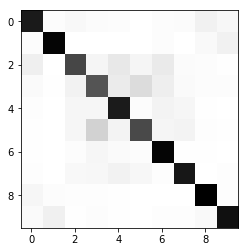

In [14]:
conf_matrix /= np.argmax(conf_matrix)
plt.imshow(1.-conf_matrix, cmap='gray')

# Wrong predicted images

In [15]:
rows = 4
img_per_row = 8

conv0_weights = convLayers[1].get_weights()[0].transpose(3, 2, 0,1)[0]
print('predicted_label(true_label)')
f, axarr = plt.subplots(rows, img_per_row, figsize=(15, 10))
img_counter = 0
for i in range(rows):
    for j in range(img_per_row):
        axarr[i, j].set_axis_off()
        axarr[i, j].imshow(wrong_pred_images[img_counter])
        axarr[i, j].set_title(labels[x_test_predict[wrong_pred]][img_counter] + '(' + 
                              labels[y_test[wrong_pred].argmax(axis=1)][img_counter] + ')')
        img_counter += 1

NameError: name 'convLayers' is not defined

# Visualising weights

In [16]:
convLayers = []
for i in [0, 4, 8, 12]:
    convLayers.append(model.layers[i])

In [17]:
conv0_weights = convLayers[0].get_weights()[0]
conv0_biases = convLayers[0].get_weights()[1]
print(conv0_weights[0].shape)
print(conv0_biases.shape)

(7, 3, 32)
(32,)


# Weights trained in first conv layer

predicted_label(true_label)


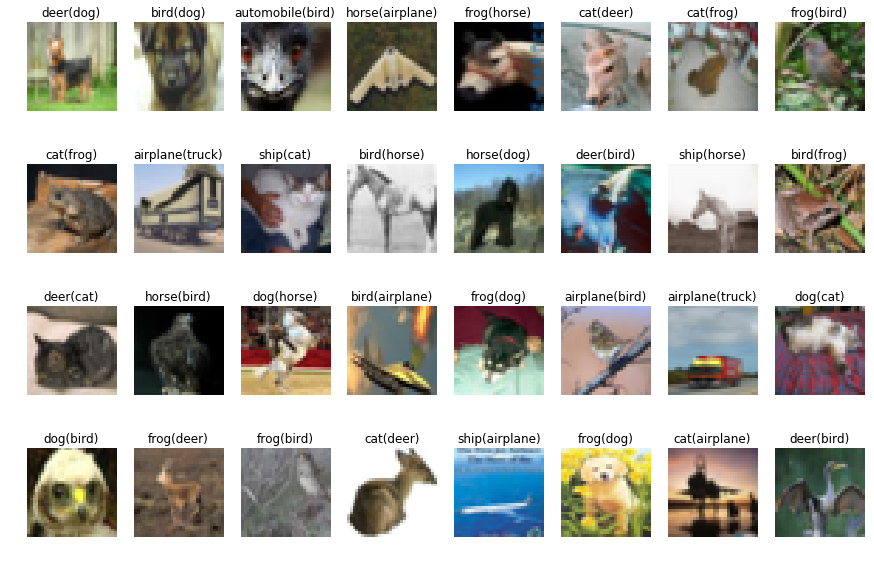

In [18]:
rows = 4
img_per_row = 8

conv0_weights = convLayers[1].get_weights()[0].transpose(3, 2, 0,1)[0]
print('predicted_label(true_label)')
f, axarr = plt.subplots(rows, img_per_row, figsize=(15, 10))
img_counter = 0
for i in range(rows):
    for j in range(img_per_row):
        axarr[i, j].set_axis_off()
        axarr[i, j].imshow(wrong_pred_images[img_counter])
        axarr[i, j].set_title(labels[x_test_predict[wrong_pred]][img_counter] + '(' + 
                              labels[y_test[wrong_pred].argmax(axis=1)][img_counter] + ')')
        img_counter += 1

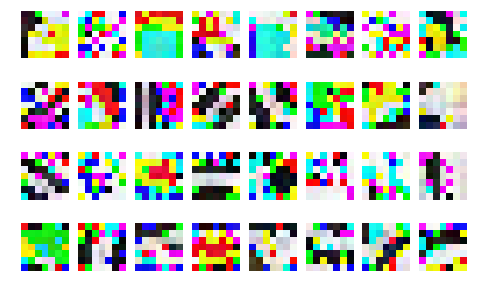

In [19]:
rows = 4
img_per_row = 8

conv0_weights = convLayers[0].get_weights()[0].transpose(3,0,1,2)
f, axarr = plt.subplots(rows, img_per_row, figsize=(8, 5))
img_counter = 0
for i in range(rows):
    for j in range(img_per_row):
        axarr[i, j].set_axis_off()
        axarr[i, j].imshow(conv0_weights[img_counter])
        img_counter += 1

# Weights trained in second conv layer

(32, 5, 5)


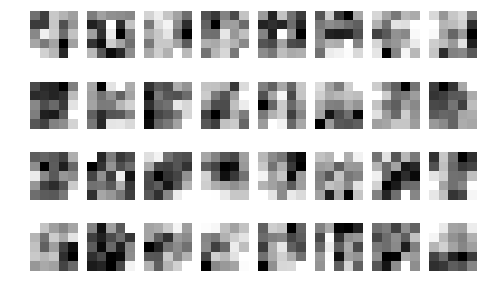

In [20]:
rows = 4
img_per_row = 8

conv0_weights = convLayers[1].get_weights()[0].transpose(3, 2, 0,1)[0]
print(conv0_weights.shape)
f, axarr = plt.subplots(rows, img_per_row, figsize=(8, 5))
img_counter = 0
for i in range(rows):
    for j in range(img_per_row):
        axarr[i, j].set_axis_off()
        axarr[i, j].imshow(conv0_weights[img_counter], cmap='gray')
        img_counter += 1

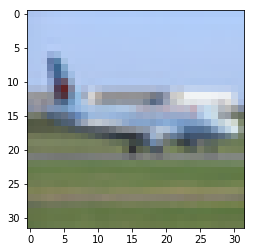

In [21]:
vis_img = x_test[4328]
plt.imshow(vis_img)

In [24]:
def show_imgs(rows = 4, img_per_row = 8, figsize=(16,8)):
    vis_img_afterconv = vis_model.predict(vis_img.reshape(1,32,32,3))[0].transpose(2,0,1)

    f, axarr = plt.subplots(rows, img_per_row, figsize=figsize)
    img_counter = 0
    for i in range(rows):
        for j in range(img_per_row):
            axarr[i, j].set_axis_off()
            axarr[i, j].imshow(vis_img_afterconv[img_counter], cmap='gray')
            img_counter += 1

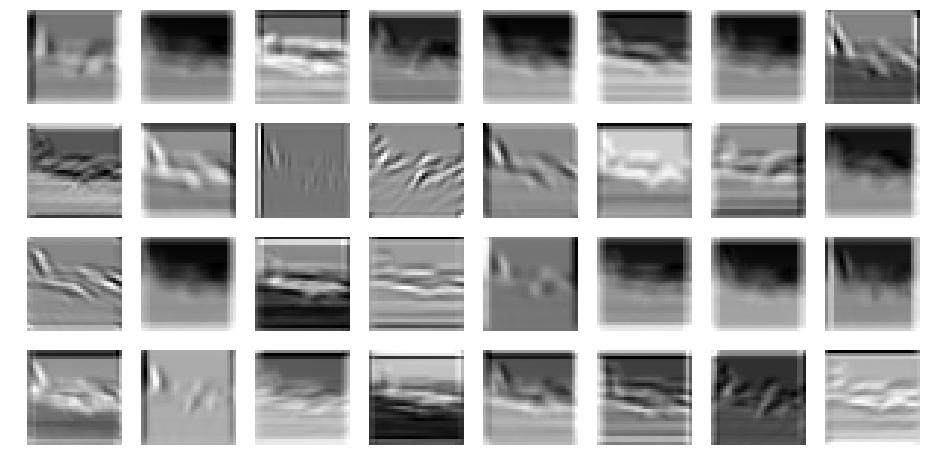

In [25]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))

show_imgs()

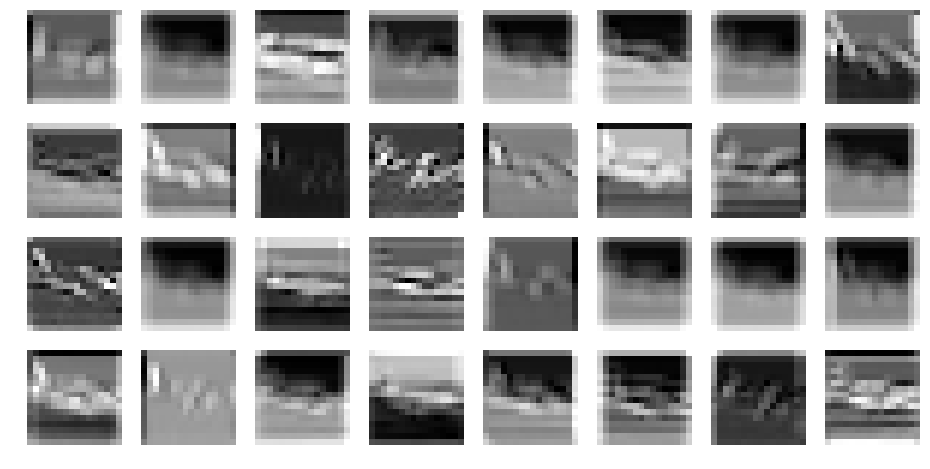

In [31]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))

show_imgs()

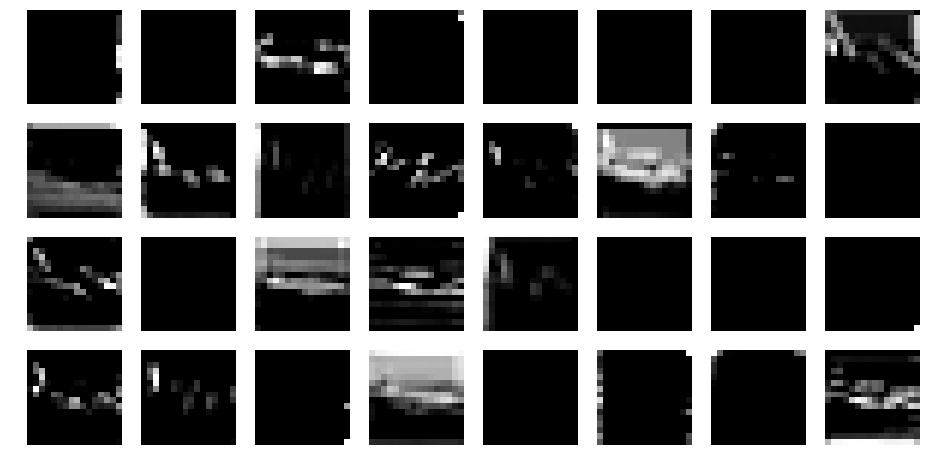

In [32]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

show_imgs()

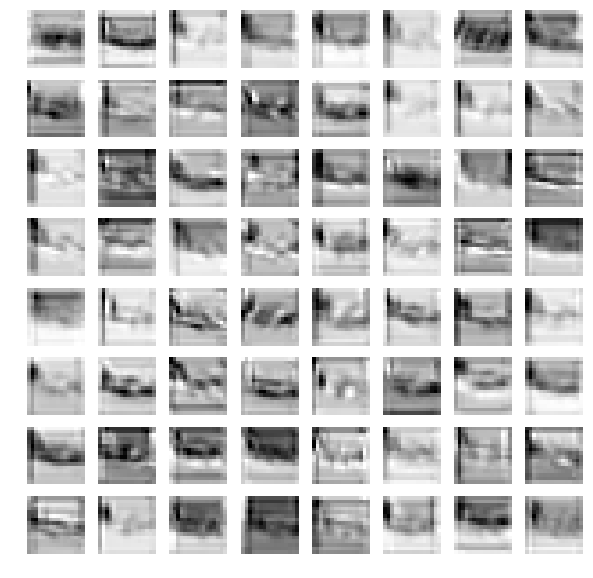

In [35]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

vis_model.add(Conv2D(64, (5, 5), padding='same', weights = model.layers[4].get_weights()))

show_imgs(rows=8, img_per_row=8, figsize=(10,10))

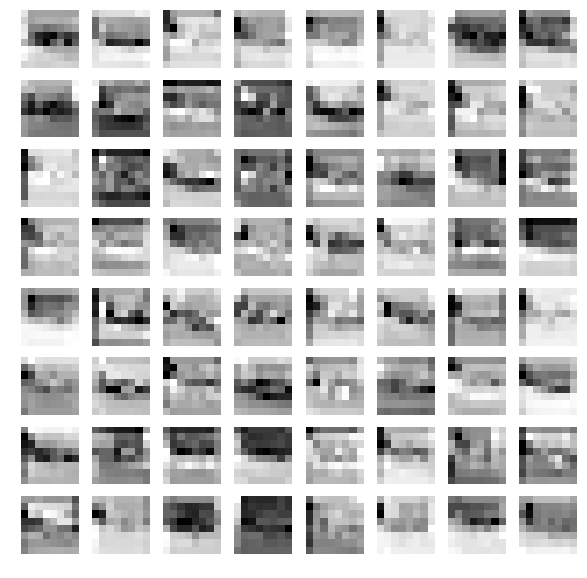

In [39]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

vis_model.add(Conv2D(64, (5, 5), padding='same', weights = model.layers[4].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[5].get_weights()))

show_imgs(rows=8, img_per_row=8, figsize=(10,10))

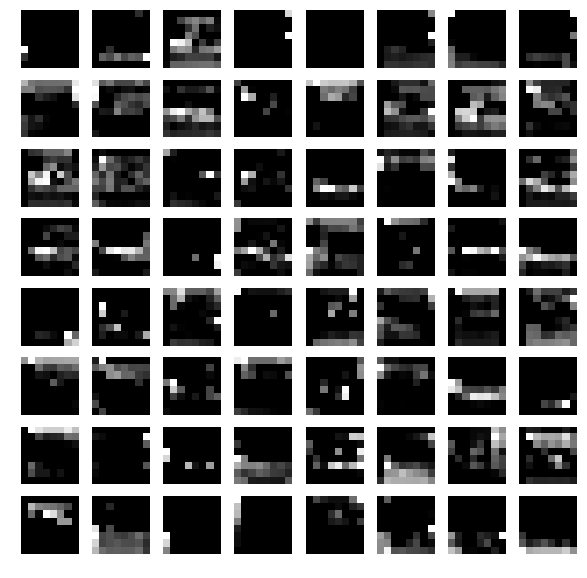

In [40]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

vis_model.add(Conv2D(64, (5, 5), padding='same', weights = model.layers[4].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[5].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[6].get_weights()))

show_imgs(rows=8, img_per_row=8, figsize=(10,10))

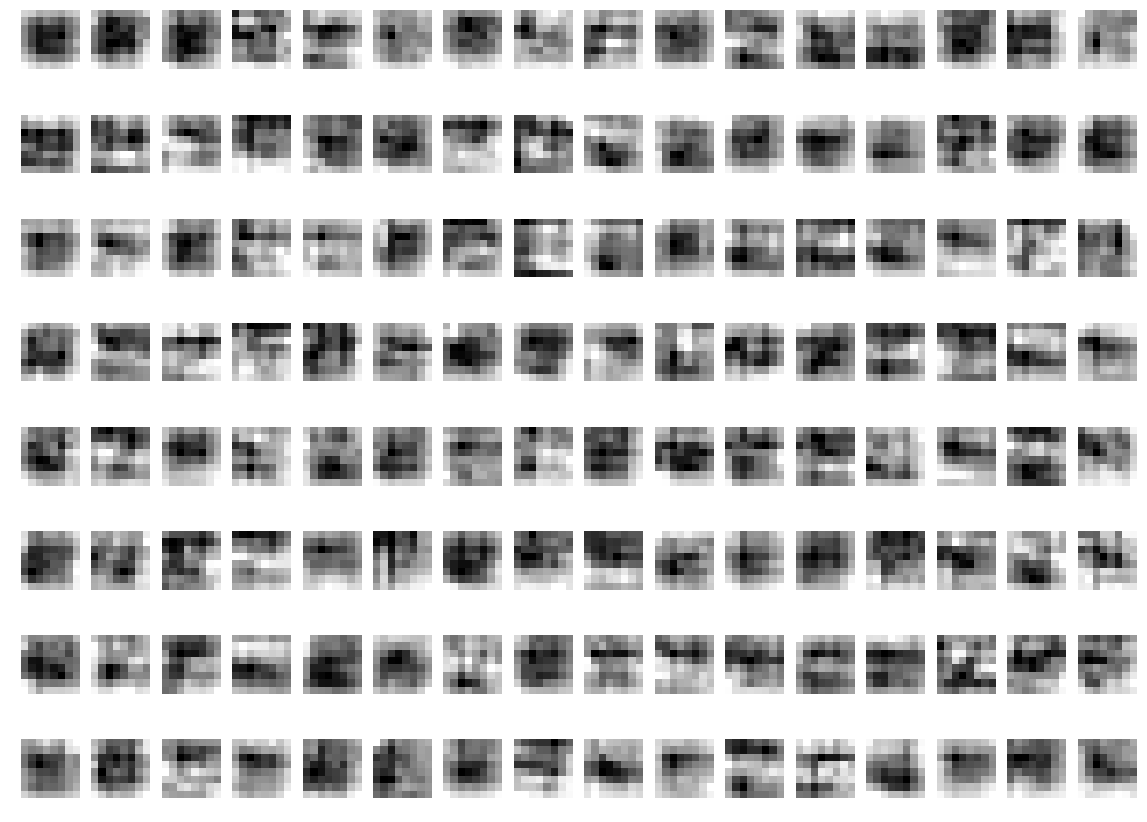

In [43]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

vis_model.add(Conv2D(64, (5, 5), padding='same', weights = model.layers[4].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[5].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[6].get_weights()))

vis_model.add(Conv2D(128, (5, 5), padding='same', weights = model.layers[8].get_weights()))

show_imgs(rows=8, img_per_row=16, figsize=(20,15))

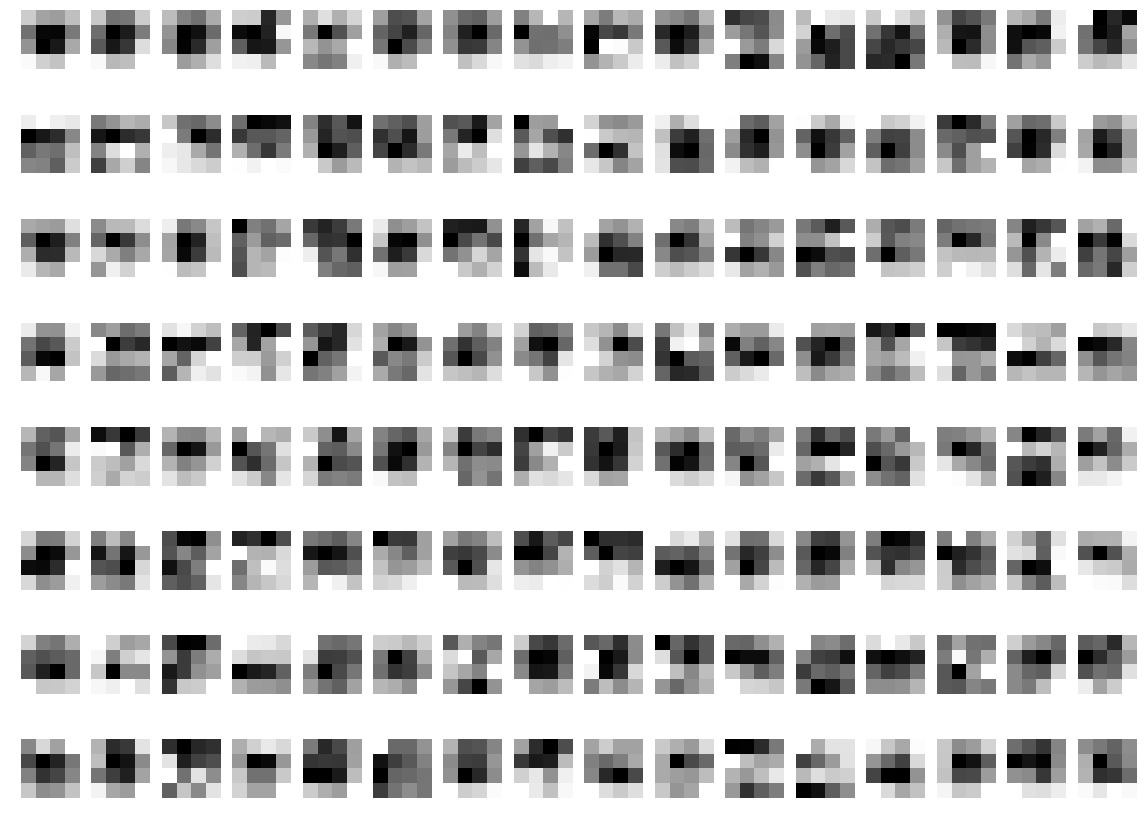

In [44]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

vis_model.add(Conv2D(64, (5, 5), padding='same', weights = model.layers[4].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[5].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[6].get_weights()))

vis_model.add(Conv2D(128, (5, 5), padding='same', weights = model.layers[8].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[9].get_weights()))

show_imgs(rows=8, img_per_row=16, figsize=(20,15))

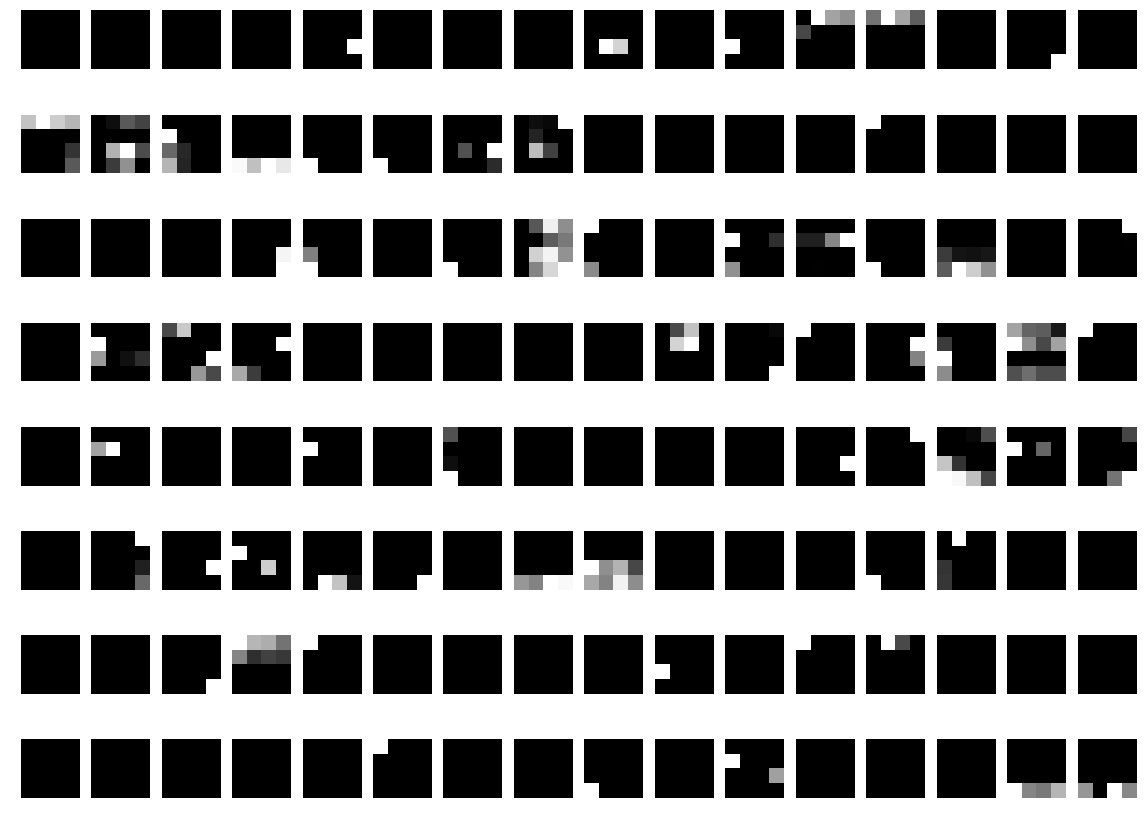

In [45]:
vis_model = Sequential()
vis_model.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[1].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[2].get_weights()))

vis_model.add(Conv2D(64, (5, 5), padding='same', weights = model.layers[4].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[5].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[6].get_weights()))

vis_model.add(Conv2D(128, (5, 5), padding='same', weights = model.layers[8].get_weights()))
vis_model.add(MaxPooling2D(pool_size=(2, 2), weights = model.layers[9].get_weights()))
vis_model.add(Activation(relu12, weights = model.layers[10].get_weights()))

show_imgs(rows=8, img_per_row=16, figsize=(20,15))